# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data
from env import get_db_url

np.random.seed(123)

# Hypotheses Testing

## $ \textrm{Hypothesis Testing Phraseology} $

<table align="center" class="table table-bordered table-hover table table-sm" style="width:60%;">
	<thead>
		<tr>
			<th rowspan="2" valign="bottom">Decision</th>
			<th colspan="2">Reality</th>
		</tr>
		<tr>
			<th><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" tabindex="0" ctxtmenu_counter="10" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="2.868ex" height="1.92ex" role="img" focusable="false" viewBox="0 -683 1267.6 848.6" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.375ex;"><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="scale(1,-1)"><g data-mml-node="math"><g data-mml-node="msub"><g data-mml-node="mi"><use data-c="1D43B" xlink:href="#MJX-TEX-I-1D43B"></use></g><g data-mml-node="mn" transform="translate(864,-150) scale(0.707)"><use data-c="30" xlink:href="#MJX-TEX-N-30"></use></g></g></g></g></svg><mjx-assistive-mml unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mn>0</mn></msub></math></mjx-assistive-mml></mjx-container> is true</th>
			<th><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" tabindex="0" ctxtmenu_counter="11" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="2.868ex" height="1.92ex" role="img" focusable="false" viewBox="0 -683 1267.6 848.6" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.375ex;"><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="scale(1,-1)"><g data-mml-node="math"><g data-mml-node="msub"><g data-mml-node="mi"><use data-c="1D43B" xlink:href="#MJX-TEX-I-1D43B"></use></g><g data-mml-node="mn" transform="translate(864,-150) scale(0.707)"><use data-c="30" xlink:href="#MJX-TEX-N-30"></use></g></g></g></g></svg><mjx-assistive-mml unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mn>0</mn></msub></math></mjx-assistive-mml></mjx-container> is false</th>
		</tr>
		<tr>
			<th scope="col">Reject <mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" tabindex="0" ctxtmenu_counter="12" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="2.868ex" height="1.92ex" role="img" focusable="false" viewBox="0 -683 1267.6 848.6" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.375ex;"><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="scale(1,-1)"><g data-mml-node="math"><g data-mml-node="msub"><g data-mml-node="mi"><use data-c="1D43B" xlink:href="#MJX-TEX-I-1D43B"></use></g><g data-mml-node="mn" transform="translate(864,-150) scale(0.707)"><use data-c="30" xlink:href="#MJX-TEX-N-30"></use></g></g></g></g></svg><mjx-assistive-mml unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mn>0</mn></msub></math></mjx-assistive-mml></mjx-container>, (conclude <mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" tabindex="0" ctxtmenu_counter="13" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="2.914ex" height="1.901ex" role="img" focusable="false" viewBox="0 -683 1288.1 840.1" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.355ex;"><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="scale(1,-1)"><g data-mml-node="math"><g data-mml-node="msub"><g data-mml-node="mi"><use data-c="1D43B" xlink:href="#MJX-TEX-I-1D43B"></use></g><g data-mml-node="mi" transform="translate(864,-150) scale(0.707)"><use data-c="1D44E" xlink:href="#MJX-TEX-I-1D44E"></use></g></g></g></g></svg><mjx-assistive-mml unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mi>a</mi></msub></math></mjx-assistive-mml></mjx-container>)</th>
			<td class="table-danger">Type I error</td>
			<td>True Positive </td>
		</tr>
		<tr>
			<th scope="col">Fail to reject <mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" tabindex="0" ctxtmenu_counter="14" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="2.868ex" height="1.92ex" role="img" focusable="false" viewBox="0 -683 1267.6 848.6" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.375ex;"><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="scale(1,-1)"><g data-mml-node="math"><g data-mml-node="msub"><g data-mml-node="mi"><use data-c="1D43B" xlink:href="#MJX-TEX-I-1D43B"></use></g><g data-mml-node="mn" transform="translate(864,-150) scale(0.707)"><use data-c="30" xlink:href="#MJX-TEX-N-30"></use></g></g></g></g></svg><mjx-assistive-mml unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mn>0</mn></msub></math></mjx-assistive-mml></mjx-container></th>
			<td>True Negative</td>
			<td class="table-danger">Type II error</td>
		</tr>
	</thead>
</table>

# Exercises

## 1 - Has the network latency gone up since we switched internet service providers?

$ H_0 = \textrm{"latency has remained constant through the switch" }$

$ H_1 = \textrm{"latency has NOT remained constant through the switch" }$

$\textrm{True Positive : "we REJECT }H_0\textrm{ and are CORRECT, the latency DID NOT remain constant" }$

$\textrm{True Negative : "we ACCEPT }H_0\textrm{ and are CORRECT, the latency remained constant" }$

$\textrm{Type I Error : "we REJECT }H_0\textrm{ but are WRONG, the latency remained constant" }$

$\textrm{Type II Error : "we ACCEPT }H_0\textrm{ but are WRONG, the latency DID NOT remain constant" }$

## 2 - Is the website redesign any good?

$ H_0 = \textrm{"Visitor count WILL NOT increase after the redesign." }$

$ H_1 = \textrm{"Visitor count WILL increase after the redesign." }$

$\textrm{True Positive : "We REJECT }H_0\textrm{ and are CORRECT, the count increased." }$

$\textrm{True Negative : "We ACCEPT }H_0\textrm{ and are CORRECT, the count DID NOT increase." }$

$\textrm{Type I Error : "We REJECT }H_0\textrm{ but are WRONG, the count DID NOT increase." }$

$\textrm{Type II Error : "We ACCEPT }H_0\textrm{ but are WRONG, the count increased" }$

## 3 - Is our television ad driving more sales?

$ H_0 = \textrm{"Monthly sales WILL NOT increase after the ad is ran." }$

$ H_1 = \textrm{"Monthly sales WILL increase after the ad is ran." }$

$\textrm{True Positive : "We REJECT }H_0\textrm{ and are CORRECT, the sales increased." }$

$\textrm{True Negative : "We ACCEPT }H_0\textrm{ and are CORRECT, the sales DID NOT increase." }$

$\textrm{Type I Error : "We REJECT }H_0\textrm{ but are WRONG, the sales DID NOT increase." }$

$\textrm{Type II Error : "We ACCEPT }H_0\textrm{ but are WRONG, the sales increased." }$

# T-Test

<table>
<thead>
<tr>
<th>Goal</th>
<th><span class="arithmatex"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span id="MathJax-Element-1-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" style="font-size: 121%; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>H</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>0</mn></mrow></msub></math>" role="presentation"><span id="MJXc-Node-1" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-2" class="mjx-mrow"><span id="MJXc-Node-3" class="mjx-msubsup"><span class="mjx-base" style="margin-right: -0.057em;"><span id="MJXc-Node-4" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.455em; padding-bottom: 0.261em; padding-right: 0.057em;">H</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-5" class="mjx-texatom" style=""><span id="MJXc-Node-6" class="mjx-mrow"><span id="MJXc-Node-7" class="mjx-mn"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.391em; padding-bottom: 0.391em;">0</span></span></span></span></span></span></span></span><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mrow class="MJX-TeXAtom-ORD"><mn>0</mn></mrow></msub></math></span></span><script type="math/tex" id="MathJax-Element-1">H_{0}</script></span></th>
<th>Data Needed</th>
<th>Parametric Test</th>
<th>Assumptions*</th>
<th>Non-parametric Test</th>
</tr>
</thead>
<tbody>
<tr>
<td>Compare observed mean to theoretical one</td>
<td><span class="arithmatex"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span id="MathJax-Element-2-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" style="font-size: 121%; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>&amp;#x03BC;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>o</mi><mi>b</mi><mi>s</mi></mrow></msub><mo>=</mo><msub><mi>&amp;#x03BC;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>t</mi><mi>h</mi></mrow></msub></math>" role="presentation"><span id="MJXc-Node-8" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-9" class="mjx-mrow"><span id="MJXc-Node-10" class="mjx-msubsup"><span class="mjx-base"><span id="MJXc-Node-11" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.52em;">μ</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.219em; padding-right: 0.071em;"><span id="MJXc-Node-12" class="mjx-texatom" style=""><span id="MJXc-Node-13" class="mjx-mrow"><span id="MJXc-Node-14" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.261em;">o</span></span><span id="MJXc-Node-15" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.455em; padding-bottom: 0.261em;">b</span></span><span id="MJXc-Node-16" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.261em;">s</span></span></span></span></span></span><span id="MJXc-Node-17" class="mjx-mo MJXc-space3"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.068em; padding-bottom: 0.326em;">=</span></span><span id="MJXc-Node-18" class="mjx-msubsup MJXc-space3"><span class="mjx-base"><span id="MJXc-Node-19" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.52em;">μ</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.219em; padding-right: 0.071em;"><span id="MJXc-Node-20" class="mjx-texatom" style=""><span id="MJXc-Node-21" class="mjx-mrow"><span id="MJXc-Node-22" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.391em; padding-bottom: 0.261em;">t</span></span><span id="MJXc-Node-23" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.455em; padding-bottom: 0.261em;">h</span></span></span></span></span></span></span></span><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>μ</mi><mrow class="MJX-TeXAtom-ORD"><mi>o</mi><mi>b</mi><mi>s</mi></mrow></msub><mo>=</mo><msub><mi>μ</mi><mrow class="MJX-TeXAtom-ORD"><mi>t</mi><mi>h</mi></mrow></msub></math></span></span><script type="math/tex" id="MathJax-Element-2">\mu_{obs} = \mu_{th}</script></span></td>
<td>array-like of observed values &amp; float of theoretical</td>
<td>One sample t-test: scipy.stats.ttest_1samp</td>
<td>Normally Distributed**</td>
<td>One sample Wilcoxon signed rank test</td>
</tr>
<tr>
<td>Compare two observed means (independent samples)</td>
<td><span class="arithmatex"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span id="MathJax-Element-3-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" style="font-size: 121%; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>&amp;#x03BC;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>a</mi></mrow></msub><mo>=</mo><msub><mi>&amp;#x03BC;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>b</mi></mrow></msub></math>" role="presentation"><span id="MJXc-Node-24" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-25" class="mjx-mrow"><span id="MJXc-Node-26" class="mjx-msubsup"><span class="mjx-base"><span id="MJXc-Node-27" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.52em;">μ</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-28" class="mjx-texatom" style=""><span id="MJXc-Node-29" class="mjx-mrow"><span id="MJXc-Node-30" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.261em;">a</span></span></span></span></span></span><span id="MJXc-Node-31" class="mjx-mo MJXc-space3"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.068em; padding-bottom: 0.326em;">=</span></span><span id="MJXc-Node-32" class="mjx-msubsup MJXc-space3"><span class="mjx-base"><span id="MJXc-Node-33" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.52em;">μ</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.219em; padding-right: 0.071em;"><span id="MJXc-Node-34" class="mjx-texatom" style=""><span id="MJXc-Node-35" class="mjx-mrow"><span id="MJXc-Node-36" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.455em; padding-bottom: 0.261em;">b</span></span></span></span></span></span></span></span><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>μ</mi><mrow class="MJX-TeXAtom-ORD"><mi>a</mi></mrow></msub><mo>=</mo><msub><mi>μ</mi><mrow class="MJX-TeXAtom-ORD"><mi>b</mi></mrow></msub></math></span></span><script type="math/tex" id="MathJax-Element-3">\mu_{a} = \mu_{b}</script></span></td>
<td>2 array-like samples</td>
<td>Independent t-test (or 2-sample): scipy.stats.ttest_ind</td>
<td>Independent, Normally Distributed**, Equal Variances***</td>
<td>Mann-Whitney's test</td>
</tr>
<tr>
<td>Compare several observed means (independent samples)</td>
<td><span class="arithmatex"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span id="MathJax-Element-4-Frame" class="mjx-chtml MathJax_CHTML" tabindex="0" style="font-size: 121%; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>&amp;#x03BC;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>a</mi></mrow></msub><mo>=</mo><msub><mi>&amp;#x03BC;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>b</mi></mrow></msub><mo>=</mo><msub><mi>&amp;#x03BC;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>n</mi></mrow></msub></math>" role="presentation"><span id="MJXc-Node-37" class="mjx-math" aria-hidden="true"><span id="MJXc-Node-38" class="mjx-mrow"><span id="MJXc-Node-39" class="mjx-msubsup"><span class="mjx-base"><span id="MJXc-Node-40" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.52em;">μ</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-41" class="mjx-texatom" style=""><span id="MJXc-Node-42" class="mjx-mrow"><span id="MJXc-Node-43" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.261em;">a</span></span></span></span></span></span><span id="MJXc-Node-44" class="mjx-mo MJXc-space3"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.068em; padding-bottom: 0.326em;">=</span></span><span id="MJXc-Node-45" class="mjx-msubsup MJXc-space3"><span class="mjx-base"><span id="MJXc-Node-46" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.52em;">μ</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.219em; padding-right: 0.071em;"><span id="MJXc-Node-47" class="mjx-texatom" style=""><span id="MJXc-Node-48" class="mjx-mrow"><span id="MJXc-Node-49" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.455em; padding-bottom: 0.261em;">b</span></span></span></span></span></span><span id="MJXc-Node-50" class="mjx-mo MJXc-space3"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.068em; padding-bottom: 0.326em;">=</span></span><span id="MJXc-Node-51" class="mjx-msubsup MJXc-space3"><span class="mjx-base"><span id="MJXc-Node-52" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.52em;">μ</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span id="MJXc-Node-53" class="mjx-texatom" style=""><span id="MJXc-Node-54" class="mjx-mrow"><span id="MJXc-Node-55" class="mjx-mi"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.197em; padding-bottom: 0.261em;">n</span></span></span></span></span></span></span></span><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>μ</mi><mrow class="MJX-TeXAtom-ORD"><mi>a</mi></mrow></msub><mo>=</mo><msub><mi>μ</mi><mrow class="MJX-TeXAtom-ORD"><mi>b</mi></mrow></msub><mo>=</mo><msub><mi>μ</mi><mrow class="MJX-TeXAtom-ORD"><mi>n</mi></mrow></msub></math></span></span><script type="math/tex" id="MathJax-Element-4">\mu_{a} = \mu_{b} = \mu_{n}</script></span></td>
<td>n array-like samples</td>
<td>ANOVA: scipy.stats.f_oneway</td>
<td>Independent, Normally Distributed**, Equal Variances</td>
<td>Kruskal-Wallis test</td>
</tr>
</tbody>
</table>

## P-Value


!['pic'](https://upload.wikimedia.org/wikipedia/commons/3/3a/P-value_in_statistical_significance_testing.svg#gh-light-mode-only)


# Exercises

## 1 - Is the average time it takes to sell homes different for Ace Realty's two offices?

$ H_0 = \textrm{"Office's A and B take EQUAL amounts of time to sell homes." }$

$ H_1 = \textrm{"Office's A and B take DIFFERENT amounts of time to sell homes." }$

In [2]:
α=0.05

In [3]:
office_one=stats.norm(90,15).rvs(40)

In [4]:
type(office_one)

numpy.ndarray

In [5]:
office_two=stats.norm(100,20).rvs(50)

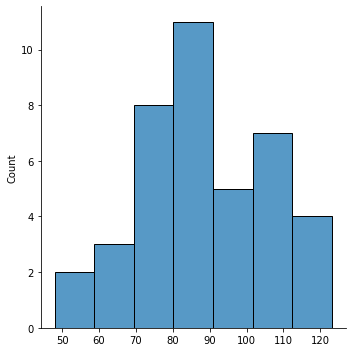

In [6]:
sns.displot(office_one)

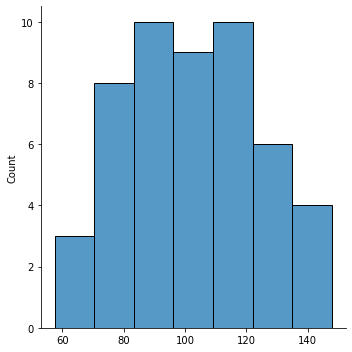

In [7]:
sns.displot(office_two)

In [8]:
office_one.var()

305.9967606679589

In [9]:
office_two.var()

503.8496730848235

In [10]:
t_l,p_l=stats.levene(office_one,office_two)
t_l,p_l

(4.1153444488036595, 0.04551874813294119)

In [11]:
t, p = stats.ttest_ind(office_one, office_two, equal_var=False)

t, p


(-3.2583006829737267, 0.001593825513361712)

In [12]:
if p < α:
	print(f'Most likely: H_1')
else:
	print('Most likely: H_0')

Most likely: H_1


## 2 - Load the mpg dataset and use it to answer the following questions:

In [13]:
df = data('mpg')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [15]:
df=df.rename(columns={"class": "vehicle_class"})

In [16]:
# stats.hmean(df['cty', 'hwy'],axis=1)

In [17]:
df['fe']=(df['cty']+df['hwy'])/2

In [18]:
df.year.unique()

array([1999, 2008])

In [19]:
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,vehicle_class,fe
141,mercury,mountaineer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv,15.0
76,ford,expedition 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv,14.0
49,dodge,dakota pickup 4wd,3.7,2008,6,manual(m6),4,15,19,r,pickup,17.0
32,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5
211,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact,25.5


### 2.a - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$ H_0 = \textrm{"2008 and 1999 cars have EQUIVALENT fuel efficiency." }$

$ H_1 = \textrm{"2008 and 1999 cars have DIFFERENT fuel efficiency." }$

In [20]:
fe_2008=df.fe[df.year==2008]
fe_2008.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: fe, dtype: float64

In [21]:
fe_1999=df.fe[df.year==1999]
fe_1999.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: fe, dtype: float64

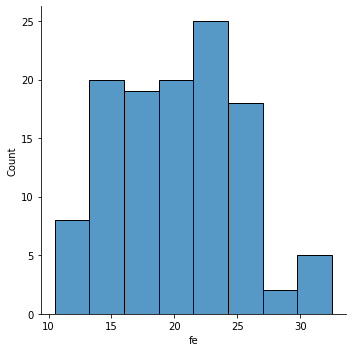

In [22]:
sns.displot(fe_2008)

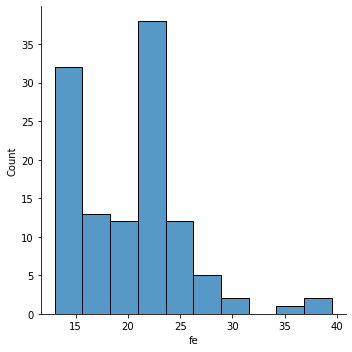

In [23]:
sns.displot(fe_1999)

In [24]:
fe_2008.var()

24.097480106100797

In [25]:
fe_1999.var()

27.122605363984682

In [26]:
# failed to reject H_0: variances are equal

t,p=stats.levene(fe_2008,fe_1999)
t,p

(0.033228136671080453, 0.855517569468803)

In [27]:
t,p=stats.ttest_ind(fe_2008,fe_1999)
t,p

(-0.21960177245940962, 0.8263744040323578)

In [28]:
if p < α:
	print(f'Most likely: H_1')
else:
	print('Most likely: H_0')

Most likely: H_0


### 2.b - Are compact cars more fuel-efficient than the average car?

$ H_0 = \textrm{"Compact cars have EQUIVALENT fuel efficiency to the average car." }$

$ H_1 = \textrm{"Compact cars have BETTER fuel efficiency than the average car." }$

In [29]:
compacts=df[df.vehicle_class=='compact'].fe
compacts.count()

47

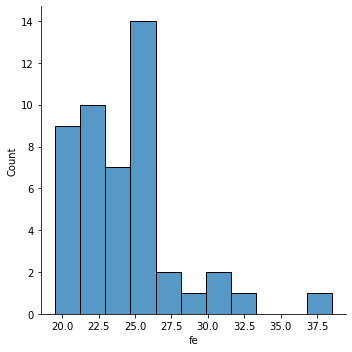

In [30]:
sns.displot(compacts)

In [31]:
compacts.var()

12.442876965772433

In [32]:
t,p=stats.ttest_1samp(compacts,df.fe.mean())
t,p

(7.896888573132535, 4.1985637943171336e-10)

In [33]:
if p/2 > α:
    print("Most likely H_0")
elif t < 0:
    print("Most likely H_0")
else:
    print("Most likely H_1")

Most likely H_1


### 2.c - Do manual cars get better gas mileage than automatic cars?

$ H_0 = \textrm{"Manual and automatic cars have EQUIVALENT fuel efficiencies." }$

$ H_1 = \textrm{"Manual cars have BETTER fuel efficiency than automatic cars." }$

In [34]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,vehicle_class,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [35]:
manuals=df[df.trans.astype(str).str[0]=='m'].fe
manuals.count()

77

In [36]:
autos=df[df.trans.astype(str).str[0]=='a'].fe
autos.count()

157

In [37]:
df.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

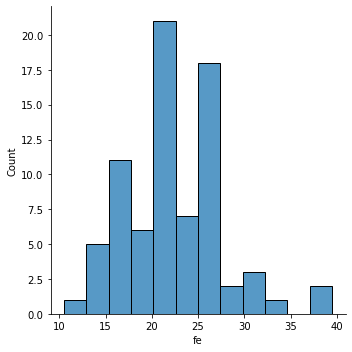

In [38]:
sns.displot(manuals)

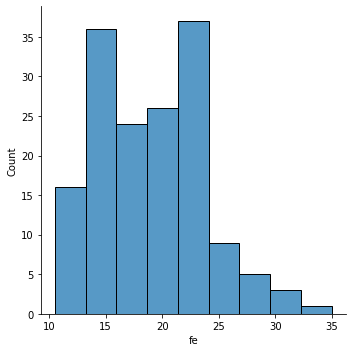

In [39]:
sns.displot(autos)

In [40]:
manuals.var()

26.635167464114826

In [41]:
autos.var()

21.942777233382337

In [42]:
# p>0.05 -> fail to reject H_0: variances are equavalent

stats.levene(manuals,autos)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [43]:
stats.ttest_ind(manuals,autos)

Ttest_indResult(statistic=4.593437735750014, pvalue=7.154374401145683e-06)

In [44]:
if p/2 > α:
    print("Most likely H_0")
elif t < 0:
    print("Most likely H_0")
else:
    print("Most likely H_1")

Most likely H_1


# Correlation

# Exercises

## 1

In [45]:
customers=pd.read_sql(
	'''
	SELECT * FROM customers
	
	''', 
	get_db_url('telco_churn'))

In [46]:
customers.total_charges.replace(' ',0,inplace=True)

In [47]:
customers.total_charges.replace('',np.nan,inplace=True)

In [48]:
customers['total_charges']=customers.total_charges.astype('float')

In [49]:
customers.rename(columns = {'internet_service_type_id':'net'}, inplace = True)

In [50]:
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,net,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


In [51]:
customers.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [52]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   net                7043 non-null   int64  
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract_type_id   7043 non-null   int64  
 16  paperless_billing  7043 

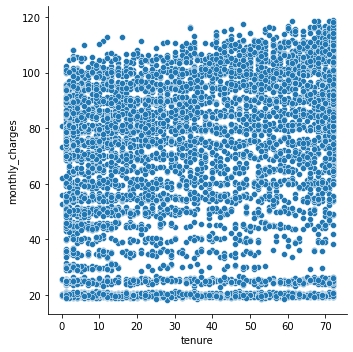

In [53]:
sns.relplot(data=customers, x='tenure', y='monthly_charges')

In [54]:
r,p =stats.pearsonr(customers.tenure,customers.monthly_charges)
r,p

(0.24789985628615008, 4.0940449915016345e-99)

Does tenure correlate with monthly charges?

In [55]:
if r<=0.2:
	print("no correlation")
elif r<=0.5:
	print("weak correlation")
elif r<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

weak correlation


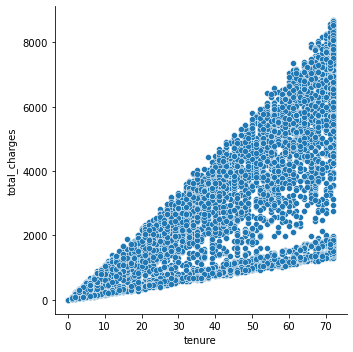

In [56]:
sns.relplot(data=customers, x='tenure', y='total_charges')

In [57]:
r,p =stats.pearsonr(customers.tenure,customers.total_charges)
r,p

(0.826178397950242, 0.0)

Does tenure correlate with total charges?

In [58]:
if r<=0.2:
	print("no correlation")
elif r<=0.5:
	print("weak correlation")
elif r<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

strong correlation


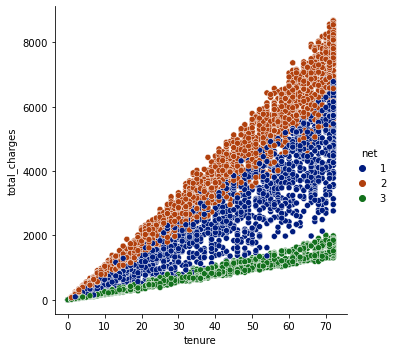

In [59]:
sns.relplot(data=customers, x='tenure', y='total_charges', hue='net', palette='dark')

In [60]:
customers[customers.net==1].tenure

0        9
1        9
5        9
8        7
9       65
        ..
7029    28
7038    13
7040     2
7041    67
7042    63
Name: tenure, Length: 2421, dtype: int64

In [61]:
dsl_m=customers[customers.net==1].monthly_charges
dsl_m.head()

0    65.60
1    59.90
5    69.40
8    48.20
9    90.45
Name: monthly_charges, dtype: float64

In [62]:
dsl_r,p =stats.pearsonr(customers[customers.net==1].tenure,customers[customers.net==1].monthly_charges)
dsl_r,p

(0.5172828196602487, 8.360426862288436e-166)

Does tenure correlate with monthly charges for dsl users?

In [63]:
if dsl_r<=0.2:
	print("no correlation")
elif dsl_r<=0.5:
	print("weak correlation")
elif dsl_r<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

moderate correlation


In [64]:
fo_r,p =stats.pearsonr(customers[customers.net==2].tenure,customers[customers.net==2].monthly_charges)
fo_r,p

(0.6246206176175583, 0.0)

Does tenure correlate with monthly charges for fiber optic users?

In [65]:
if fo_r<=0.2:
	print("no correlation")
elif fo_r<=0.5:
	print("weak correlation")
elif fo_r<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

moderate correlation


In [66]:
no_r,p =stats.pearsonr(customers[customers.net==3].tenure,customers[customers.net==3].monthly_charges)
no_r,p

(0.3423256230619446, 3.356186955197392e-43)

Does tenure correlate with monthly charges for non-internet users?

In [67]:
if no_r<=0.2:
	print("no correlation")
elif no_r<=0.5:
	print("weak correlation")
elif no_r<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

weak correlation


In [68]:
dsl_tr,p =stats.pearsonr(customers[customers.net==1].tenure,customers[customers.net==1].total_charges)
dsl_tr,p

(0.9413276892816257, 0.0)

Does tenure correlate with total charges for dsl users?

In [69]:
if dsl_tr<=0.2:
	print("no correlation")
elif dsl_tr<=0.5:
	print("weak correlation")
elif dsl_tr<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

strong correlation


In [70]:
fo_tr,p =stats.pearsonr(customers[customers.net==2].tenure,customers[customers.net==2].total_charges)
fo_tr,p

(0.9853093528070602, 0.0)

Does tenure correlate with total charges for fiber optic users?

In [71]:
if fo_tr<=0.2:
	print("no correlation")
elif fo_tr<=0.5:
	print("weak correlation")
elif fo_tr<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

strong correlation


In [72]:
no_tr,p =stats.pearsonr(customers[customers.net==3].tenure,customers[customers.net==3].total_charges)
no_tr,p

(0.9815669784401058, 0.0)

Does tenure correlate with total charges for non-internet users?

In [73]:
if no_tr<=0.2:
	print("no correlation")
elif no_tr<=0.5:
	print("weak correlation")
elif no_tr<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

strong correlation


In [74]:
phone_r,p =stats.pearsonr(customers[customers.phone_service=='Yes'].tenure,customers[customers.phone_service=='Yes'].monthly_charges)
phone_r,p

(0.24538898585362875, 7.117871077967264e-88)

Does tenure correlate with monthly charges for phone users?

In [75]:
if phone_r<=0.2:
	print("no correlation")
elif phone_r<=0.5:
	print("weak correlation")
elif phone_r<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

weak correlation


In [76]:
npho_r,p =stats.pearsonr(customers[customers.phone_service=='No'].tenure,customers[customers.phone_service=='No'].monthly_charges)
npho_r,p

(0.5857597986661366, 4.603370347342836e-64)

Does tenure correlate with monthly charges for non-phone users?

In [77]:
if npho_r<=0.2:
	print("no correlation")
elif npho_r<=0.5:
	print("weak correlation")
elif npho_r<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

moderate correlation


In [78]:
pho_tr,p =stats.pearsonr(customers[customers.phone_service=='Yes'].tenure,customers[customers.phone_service=='Yes'].total_charges)
pho_tr,p

(0.8301076972900363, 0.0)

Does tenure correlate with total charges for phone users?

In [79]:
if pho_tr<=0.2:
	print("no correlation")
elif pho_tr<=0.5:
	print("weak correlation")
elif pho_tr<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

strong correlation


In [80]:
npho_tr,p =stats.pearsonr(customers[customers.phone_service=='No'].tenure,customers[customers.phone_service=='No'].total_charges)
npho_tr,p

(0.9535697728407464, 0.0)

Does tenure correlate with total charges for phone users?

In [81]:
if npho_tr<=0.2:
	print("no correlation")
elif npho_tr<=0.5:
	print("weak correlation")
elif npho_tr<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

strong correlation


## 2

In [82]:
employees=pd.read_sql(
	'''
	SELECT emp_no,
		SUM(salary) AS salary,
		DATEDIFF(CURDATE(),MIN(to_date)) AS tenure
	FROM salaries
	GROUP BY emp_no
	
	
	;
	''', 
	get_db_url('employees'))

In [83]:
employees.head()

,emp_no,salary,tenure
0,10001,1281612.0,12661
1,10002,413127.0,8970
2,10003,301212.0,9214
3,10004,904196.0,12503
4,10005,1134585.0,11487


In [84]:
r,p =stats.pearsonr(employees.salary,employees.tenure)
r,p

(0.7553157610561743, 0.0)

Is there a relationship between how long an employee has been with the company and their salary?

In [85]:
if r<=0.2:
	print("no correlation")
elif r<=0.5:
	print("weak correlation")
elif r<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

strong correlation


In [86]:
emp_title=pd.read_sql(
	'''
    WITH emp_title_count AS (
        SELECT emp_no, COUNT(*) as n_titles
        FROM employees e
        JOIN titles t USING (emp_no)
        GROUP BY emp_no
    )
    SELECT
        e.emp_no,
        DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
        n_titles
    FROM employees e
    JOIN emp_title_count USING (emp_no)
	;
	''', 
	get_db_url('employees'))

In [87]:
emp_title.head()

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


In [88]:
r,p=stats.pearsonr(emp_title.tenure,emp_title.n_titles)

In [89]:
if r<=0.2:
	print("no correlation")
elif r<=0.5:
	print("weak correlation")
elif r<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

weak correlation


## 3

In [90]:
sleeps=data('sleepstudy')

In [91]:
sleeps.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [92]:
r,p=stats.pearsonr(sleeps.Days,sleeps.Reaction)
r,p

(0.5352302262650253, 9.894096322214812e-15)

Is there a relationship between days and reaction time?

In [93]:
if r<=0.2:
	print("no correlation")
elif r<=0.5:
	print("weak correlation")
elif r<=0.75:
	print("moderate correlation")
else:
	print("strong correlation")

moderate correlation


# Chi^2 Test

# Exercises

## Mini Exercise

In [94]:
α = 0.05

In [95]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/6ba2dd985c9aa92f5598fc0f7c359f6a/raw/b20a508cee46e6ac69eb1e228b167d6f42d665d8/attrition.csv")


In [96]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [97]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [98]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [99]:
observed = pd.crosstab(df.Attrition, df.Department)
observed.values

array([[ 51, 828, 354],
       [ 12, 133,  92]])

In [100]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [101]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 51 828 354]
 [ 12 133  92]]
---
Expected

[[ 52 806 374]
 [ 10 154  71]]
---

chi^2 = 10.7960
p     = 0.0045


Is Attrition independent from Department?

- $H_0$: There is no association between Attrition and Department (They are independent)

- $H_a$: There is an association between Attrition and Department (They are not independent)

In [102]:
if p < α:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis


## 1 - Is using a macbook and being a codeup student independent of each other.

In [103]:
α=0.05

In [104]:
macbooks=[[49,20],[1,30]]

In [105]:
chi2, p, degf, expected = stats.chi2_contingency(macbooks)

In [106]:
chi2, p, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

$ H_0 = \textrm{"Codeup students and macbooks are independent." }$

$ H_1 = \textrm{"Codeup students and macbooks are NOT independent." }$

In [107]:
if p > α:
    print("Most likely H_0")
# elif t < 0:
#     print("Most likely H_0")
else:
    print("Most likely H_1")

Most likely H_1


## 2 - Choose another 2 categorical variables from the mpg dataset and perform a chi^2 contingency table test with them.

### 2.a

In [108]:
mpg=pd.DataFrame(data('mpg'))

In [109]:
mpg.head().to_markdown()

'|    | manufacturer   | model   |   displ |   year |   cyl | trans      | drv   |   cty |   hwy | fl   | class   |\n|---:|:---------------|:--------|--------:|-------:|------:|:-----------|:------|------:|------:|:-----|:--------|\n|  1 | audi           | a4      |     1.8 |   1999 |     4 | auto(l5)   | f     |    18 |    29 | p    | compact |\n|  2 | audi           | a4      |     1.8 |   1999 |     4 | manual(m5) | f     |    21 |    29 | p    | compact |\n|  3 | audi           | a4      |     2   |   2008 |     4 | manual(m6) | f     |    20 |    31 | p    | compact |\n|  4 | audi           | a4      |     2   |   2008 |     4 | auto(av)   | f     |    21 |    30 | p    | compact |\n|  5 | audi           | a4      |     2.8 |   1999 |     6 | auto(l5)   | f     |    16 |    26 | p    | compact |'

In [110]:
mpg.rename(columns={'class':'vehicle_class'}).head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,vehicle_class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [111]:
mpg['transmission']=mpg.trans.str[0]

In [112]:
mpg['fe']=(mpg.cty+mpg.hwy)/2

In [113]:
man_fe=pd.crosstab(
	mpg.manufacturer,
	mpg.fe>20)
man_fe

fe,False,True
manufacturer,,
audi,4,14
chevrolet,12,7
dodge,33,4
ford,22,3
honda,0,9
hyundai,1,13
jeep,8,0
land rover,4,0
lincoln,3,0


In [114]:
chi2, p, dof, expected = stats.chi2_contingency(man_fe)

In [115]:
chi2, p, dof, expected

(126.58612008976908,
 3.202337692419306e-20,
 14,
 array([[ 8.53846154,  9.46153846],
        [ 9.01282051,  9.98717949],
        [17.55128205, 19.44871795],
        [11.85897436, 13.14102564],
        [ 4.26923077,  4.73076923],
        [ 6.64102564,  7.35897436],
        [ 3.79487179,  4.20512821],
        [ 1.8974359 ,  2.1025641 ],
        [ 1.42307692,  1.57692308],
        [ 1.8974359 ,  2.1025641 ],
        [ 6.16666667,  6.83333333],
        [ 2.37179487,  2.62820513],
        [ 6.64102564,  7.35897436],
        [16.12820513, 17.87179487],
        [12.80769231, 14.19230769]]))

$ H_0 = \textrm{"Manufacturer and fuel efficiency are independent." }$

$ H_1 = \textrm{"Manufacturer and fuel efficiency are NOT independent." }$

In [116]:
if p > α:
    print("Most likely H_0, failed to reject H_0.")
# elif t < 0:
#     print("Most likely H_0")
else:
    print("Most likely H_1, reject H_0.")

Most likely H_1, reject H_0.


### 2.b

In [117]:
year_transmission=pd.crosstab(
	mpg.year,
	mpg.transmission=='a')
year_transmission

transmission,False,True
year,,
1999,43,74
2008,34,83


In [118]:
chi2, p, degf, expected = stats.chi2_contingency(year_transmission)

In [119]:
chi2, p, degf, expected

(1.2388121432707422,
 0.2657001056392438,
 1,
 array([[38.5, 78.5],
        [38.5, 78.5]]))

$ H_0 = \textrm{"Year and transmisison type are independent." }$

$ H_1 = \textrm{"Year and transmisison type are NOT independent." }$

In [120]:
if p > α:
    print("Most likely H_0 / failed to reject H_0")
# elif t < 0:
#     print("Most likely H_0")
else:
    print("Most likely H_1 / reject H_0")

Most likely H_0 / failed to reject H_0


## 3 - Use the data from the employees database to answer these questions:

### 3.a - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [121]:
emp_gen=pd.read_sql(
	'''
	SELECT d.dept_name, e.gender
	FROM dept_emp de
		LEFT JOIN employees e USING (emp_no)
		LEFT JOIN departments d using (dept_no)
	WHERE de.to_date > NOW()
		AND (d.dept_name = 'Sales'
			OR d.dept_name = 'Marketing')

	;
	''', 
	get_db_url('employees'))

In [122]:
emp_gen

,dept_name,gender
0,Marketing,F
1,Marketing,M
2,Marketing,F
3,Marketing,F
4,Marketing,F
...,...,...
52538,Sales,F
52539,Sales,M
52540,Sales,M
52541,Sales,F


In [123]:
gen_dept=pd.crosstab(
	emp_gen.dept_name,
	emp_gen.gender)
gen_dept

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [124]:
chi2, p, degf, expected = stats.chi2_contingency(gen_dept)

In [125]:
chi2, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013,  8948.7573987],
        [14969.7573987, 22731.2426013]]))

$ H_0 = \textrm{"Gender and department are independent." }$

$ H_1 = \textrm{"Gender and department are NOT independent." }$

In [126]:
if p > α:
    print("Most likely H_0 / failed to reject H_0")
# elif t < 0:
#     print("Most likely H_0")
else:
    print("Most likely H_1 / reject H_0")

Most likely H_0 / failed to reject H_0


### 3.b - Is an employee's gender independent of whether or not they are or have been a manager?

In [127]:
gen_man=pd.read_sql(
	'''
	SELECT *
	FROM employees e
		LEFT JOIN dept_manager dm USING (emp_no)



	;
	''', 
	get_db_url('employees'))

In [128]:
gen_man.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None


In [129]:
gen_man.nunique()

emp_no        300024
birth_date      4750
first_name      1275
last_name       1637
gender             2
hire_date       5434
dept_no            9
from_date         16
to_date           16
dtype: int64

In [130]:
gen_man.dept_no.isnull().sort_values()

100008    False
100012    False
100011    False
100010    False
100009    False
          ...  
99997      True
99996      True
99995      True
100035     True
300023     True
Name: dept_no, Length: 300024, dtype: bool

In [131]:
gender_manager=pd.crosstab(
	gen_man.gender,
	gen_man.dept_no.isnull())
gender_manager

dept_no,False,True
gender,,
F,13,120038
M,11,179962


In [132]:
chi2, p, degf, expected = stats.chi2_contingency(gen_dept)

In [133]:
chi2, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013,  8948.7573987],
        [14969.7573987, 22731.2426013]]))

$ H_0 = \textrm{"Gender and managment are independent." }$

$ H_1 = \textrm{"Gender and managment are NOT independent." }$

In [134]:
if p > α:
    print("Most likely H_0 / failed to reject H_0")
# elif t < 0:
#     print("Most likely H_0")
else:
    print("Most likely H_1 / reject H_0")

Most likely H_0 / failed to reject H_0
